Insurance Risk & Claim Dataset


# Import library

In [1]:
import re
import string
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings as wn
wn.filterwarnings(action='ignore')


# Classification & Regression

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//insurance//data//insurance_class_reg_data.csv")
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

customer_id  policy_id  customer_age  gender policy_type  monthly_income  \
0  CUST100000  POL100000            45    Male    Property        57926.04   
1  CUST100001  POL100001            52    Male        Auto        52957.88   
2  CUST100002  POL100002            27  Female        Auto        64713.71   
3  CUST100003  POL100003            33    Male        Life        50990.42   
4  CUST100004  POL100004            24  Female        Life        76379.88   

   vehicle_or_property_age  claim_history  fraudulent_claim  premium_amount  \
0                        6              0                 0         1100.36   
1                        6              0                 0         1038.41   
2                        3              2                 0         1127.81   
3                        4              1                 0         1086.71   
4                       10              0                 1         1072.40   

   claim_amount risk_score location  policy_upgrade  
0        719.87        Low  Chicago               1  
1       1483.60        Low  Chicago               0  
2       2247.89        Low  Chicago               0  
3       3012.94        Low  Houston               0  
4       2710.86     Medium  Houston               0

## Univariate analysis

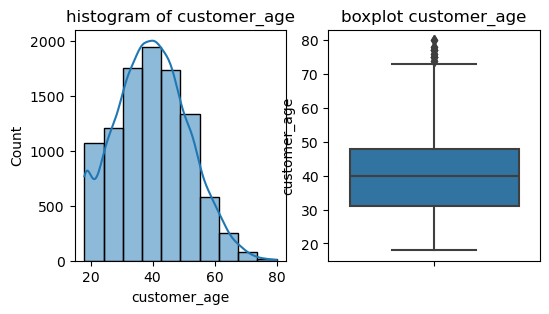

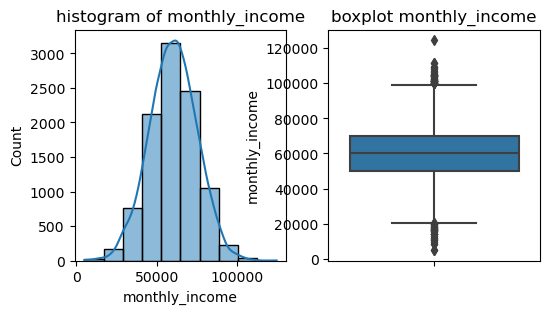

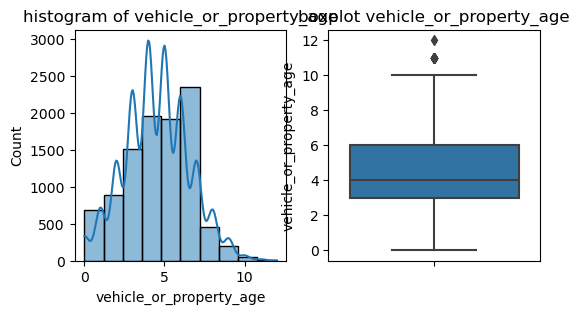

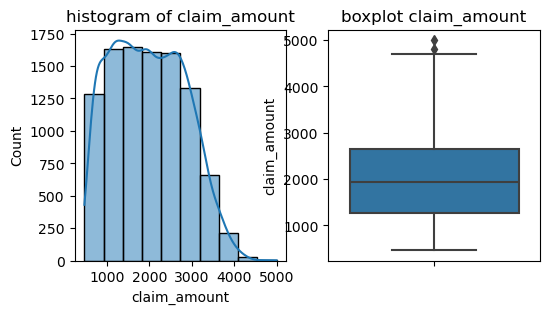

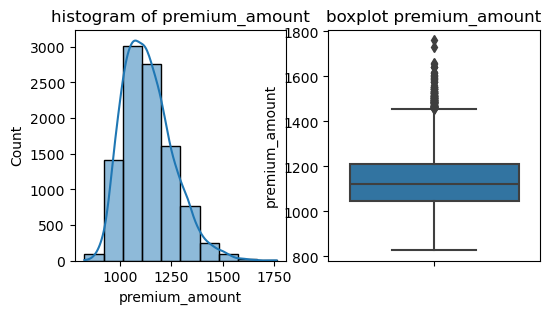

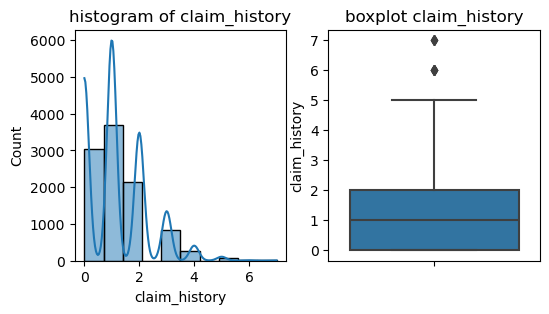

In [3]:
num_cols = ['customer_age', 'monthly_income', 'vehicle_or_property_age', 'claim_amount', 'premium_amount', 'claim_history']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()

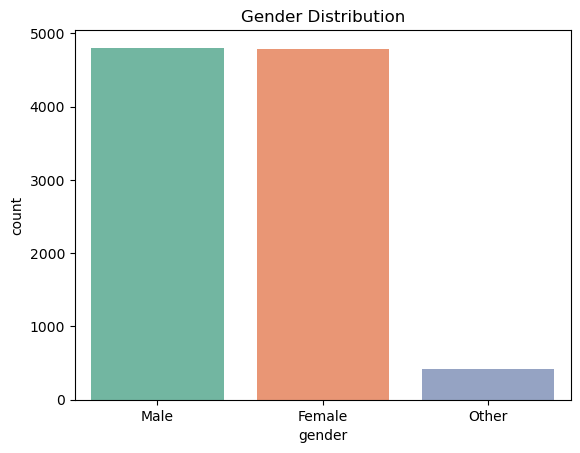

In [4]:
# Gender Distribution
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

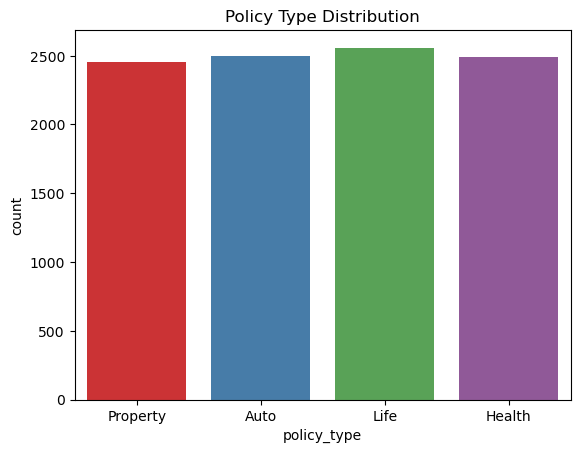

In [5]:
# Policy Type Distribution
sns.countplot(data=df, x='policy_type', palette='Set1')
plt.title("Policy Type Distribution")
plt.show()

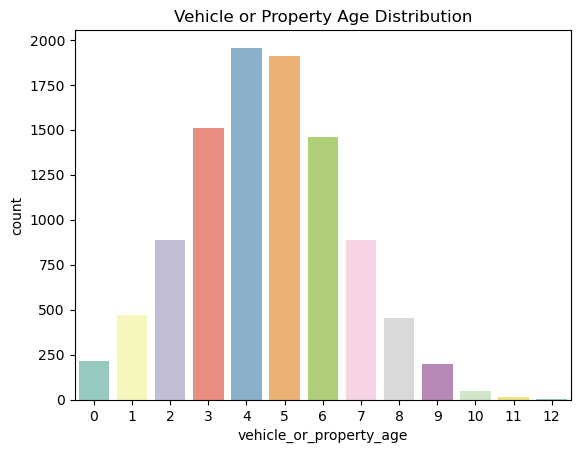

In [6]:
# Vehicle or Property Age Distribution
sns.countplot(data=df, x='vehicle_or_property_age', palette='Set3')
plt.title("Vehicle or Property Age Distribution")
plt.show()

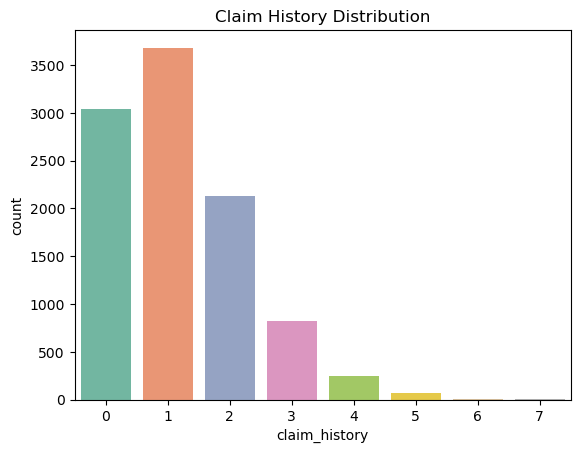

In [7]:
# Claim History Distribution
sns.countplot(data=df, x='claim_history', palette='Set2')
plt.title("Claim History Distribution")
plt.show()

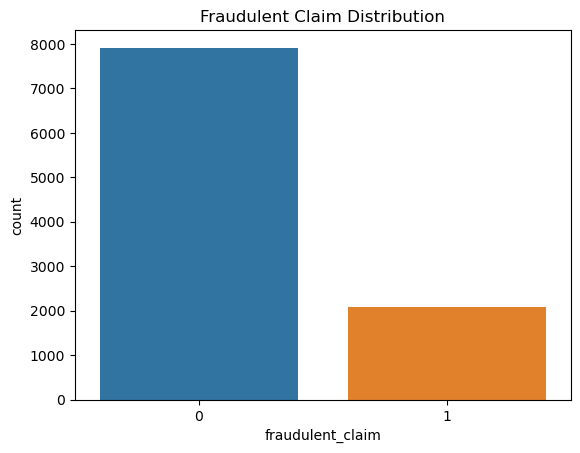

In [8]:
# Fraudulent Claim Distribution
sns.countplot(data=df, x='fraudulent_claim')
plt.title("Fraudulent Claim Distribution")
plt.show()

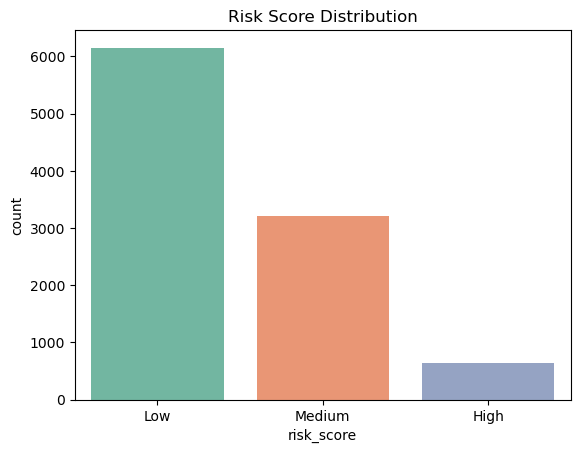

In [9]:
# Risk Score Distribution
sns.countplot(data=df, x='risk_score', palette='Set2')
plt.title("Risk Score Distribution")
plt.show()

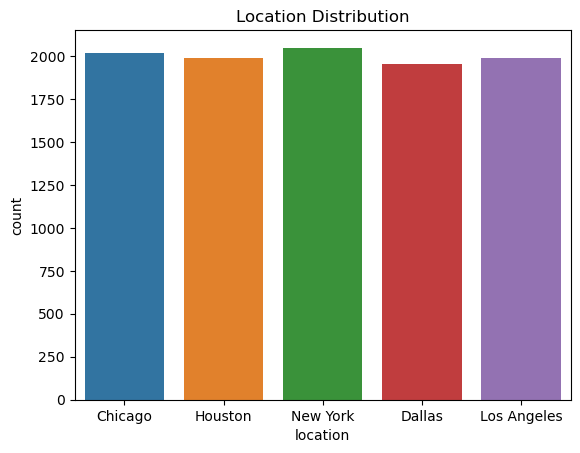

In [10]:
# Location Distribution
sns.countplot(data=df, x='location')
plt.title("Location Distribution")
plt.show()

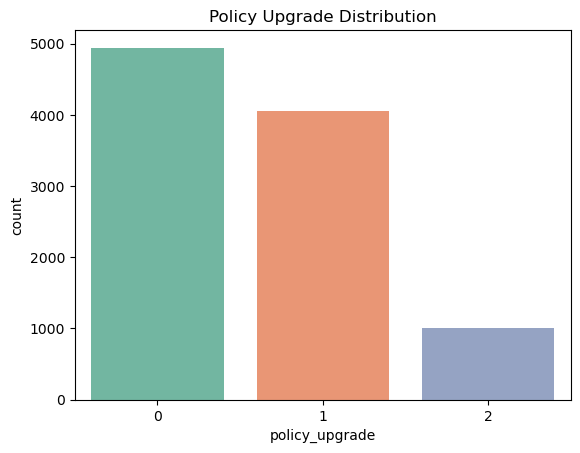

In [11]:
# Policy Upgrade Distribution
sns.countplot(data=df, x='policy_upgrade', palette='Set2')
plt.title("Policy Upgrade Distribution")
plt.show()

## Bivariate analysis

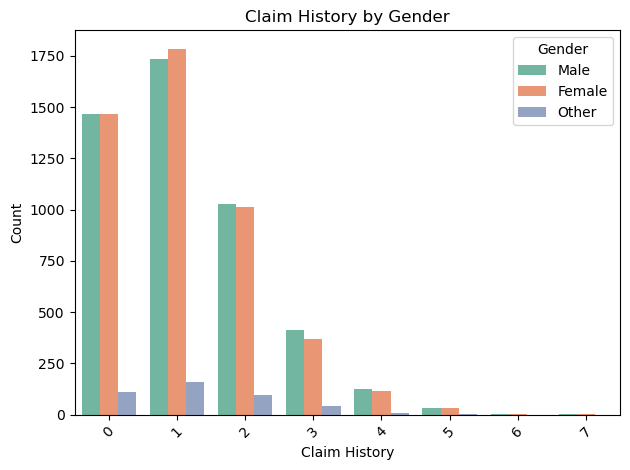

In [12]:
sns.countplot(data=df, x='claim_history', hue='gender', palette='Set2')
plt.title("Claim History by Gender")
plt.xlabel("Claim History")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

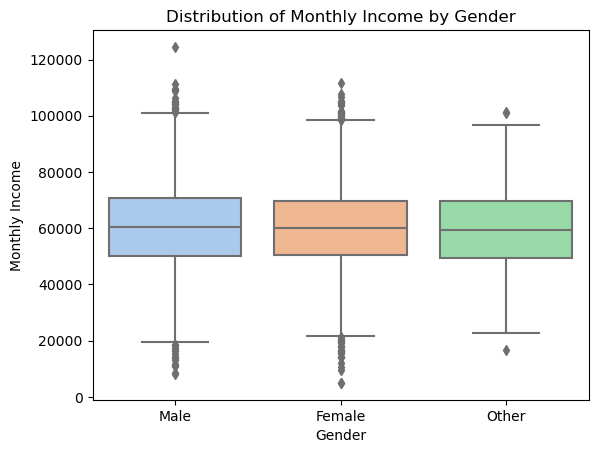

In [13]:
sns.boxplot(x='gender', y='monthly_income', data=df, palette='pastel')
plt.title("Distribution of Monthly Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()

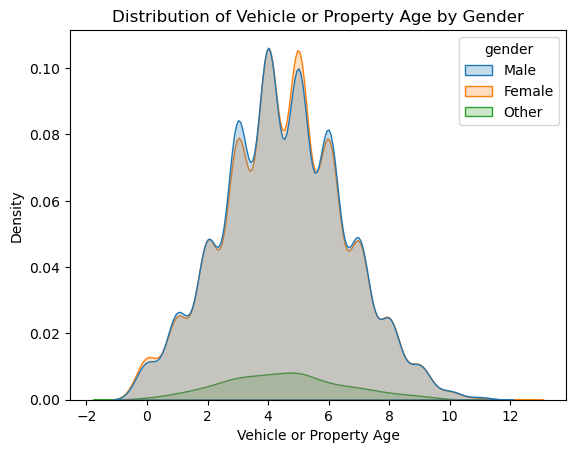

In [14]:
sns.kdeplot(data=df, x='vehicle_or_property_age', hue='gender', fill=True)
plt.title("Distribution of Vehicle or Property Age by Gender")
plt.xlabel("Vehicle or Property Age")
plt.show()

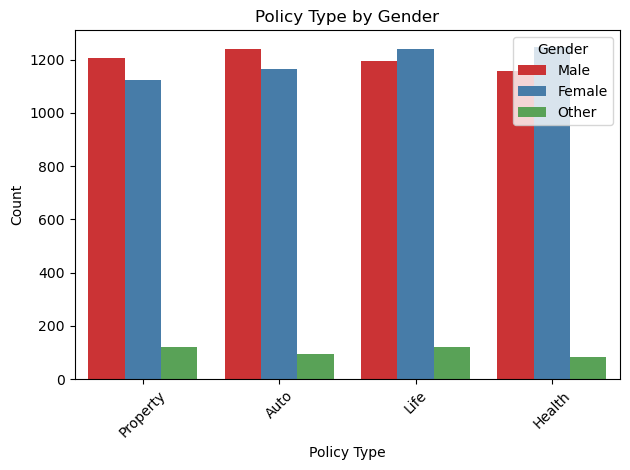

In [15]:
sns.countplot(data=df, x='policy_type', hue='gender', palette='Set1')
plt.title("Policy Type by Gender")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

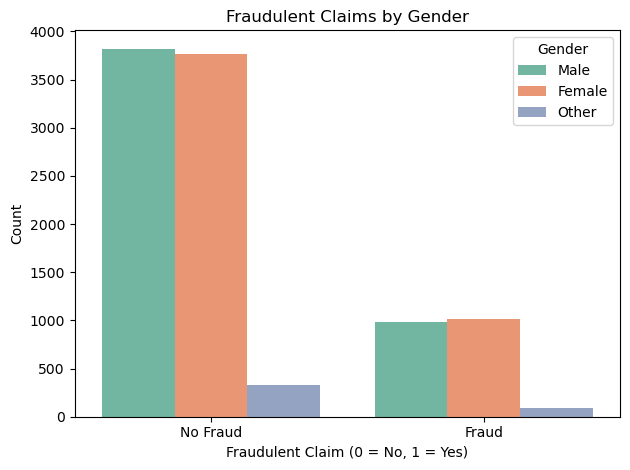

In [16]:
sns.countplot(data=df, x='fraudulent_claim', hue='gender', palette='Set2')
plt.title("Fraudulent Claims by Gender")
plt.xlabel("Fraudulent Claim (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

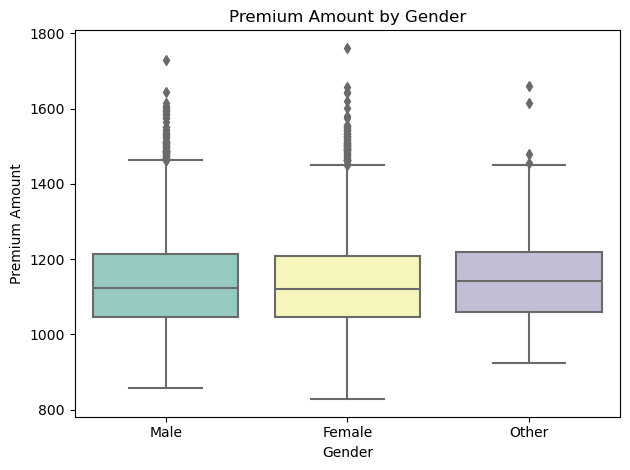

In [17]:
sns.boxplot(data=df, x='gender', y='premium_amount', palette='Set3')
plt.title("Premium Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Premium Amount")
plt.tight_layout()
plt.show()

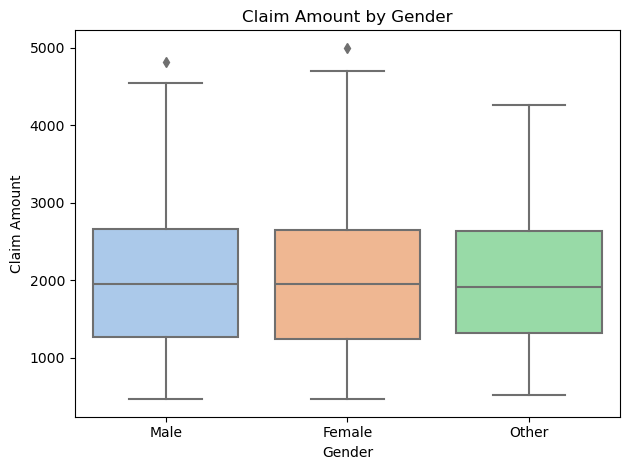

In [18]:
sns.boxplot(data=df, x='gender', y='claim_amount', palette='pastel')
plt.title("Claim Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Claim Amount")
plt.tight_layout()
plt.show()

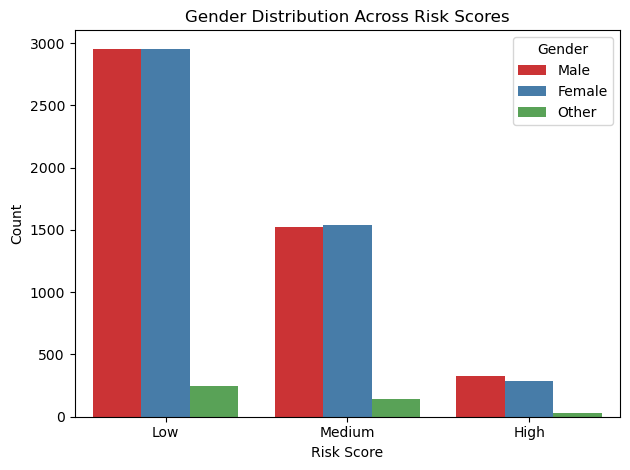

In [19]:
sns.countplot(data=df, x='risk_score', hue='gender', palette='Set1')
plt.title("Gender Distribution Across Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

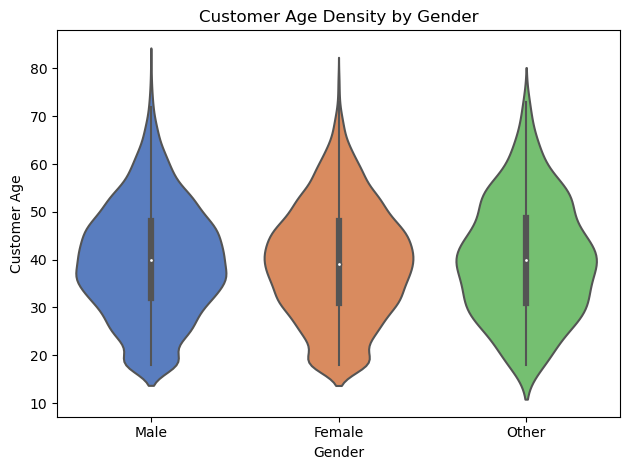

In [20]:
sns.violinplot(data=df, x='gender', y='customer_age', palette='muted')
plt.title("Customer Age Density by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()


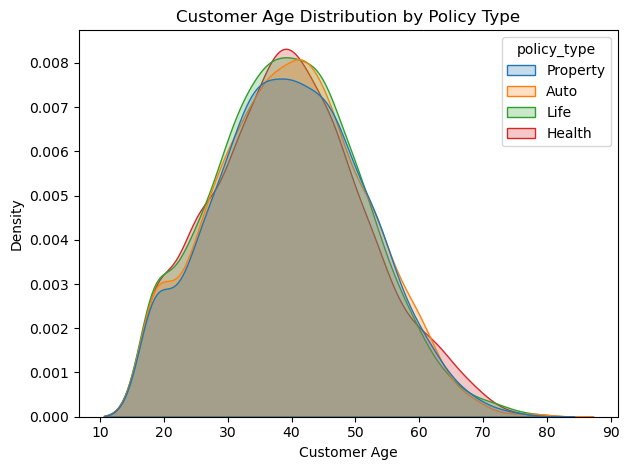

In [21]:
sns.kdeplot(data=df, x='customer_age', hue='policy_type', fill=True)
plt.title("Customer Age Distribution by Policy Type")
plt.xlabel("Customer Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

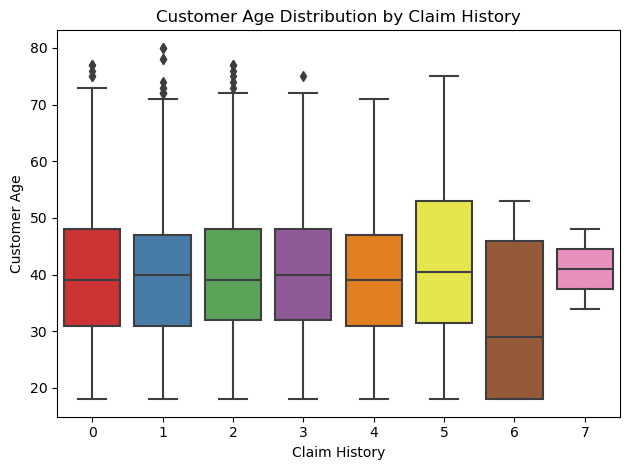

In [22]:
sns.boxplot(data=df, x='claim_history', y='customer_age', palette='Set1')
plt.title("Customer Age Distribution by Claim History")
plt.xlabel("Claim History")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

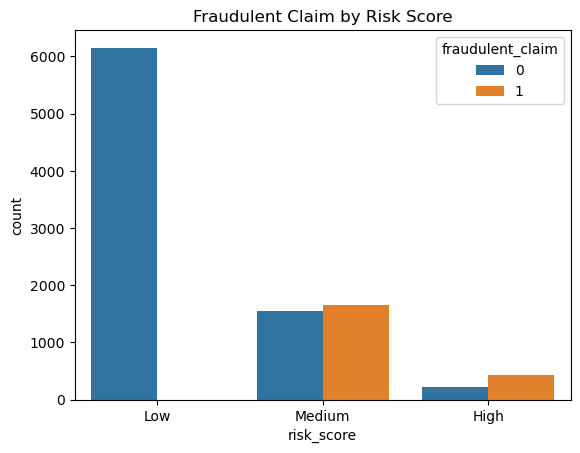

In [23]:
# Risk Score vs Fraud
df1 = df[['risk_score','fraudulent_claim']].copy()
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

sns.countplot(data=df1, x='risk_score', hue='fraudulent_claim')
plt.title('Fraudulent Claim by Risk Score')
plt.show()

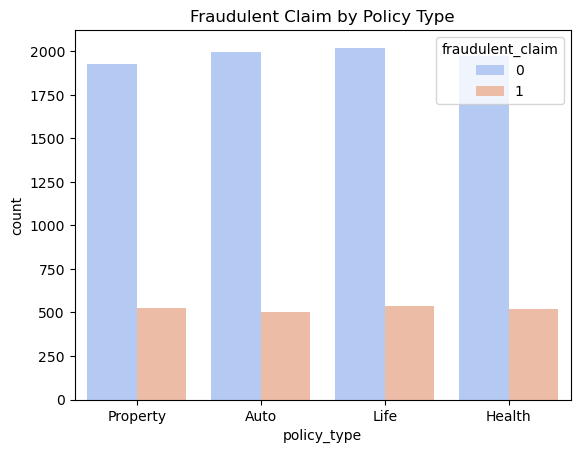

In [24]:
# Fraud vs Policy Type
df1 = df[['fraudulent_claim', 'policy_type']].copy()
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

# Plot
sns.countplot(data=df1, x='policy_type', hue='fraudulent_claim', palette='coolwarm')
plt.title('Fraudulent Claim by Policy Type')
plt.show()

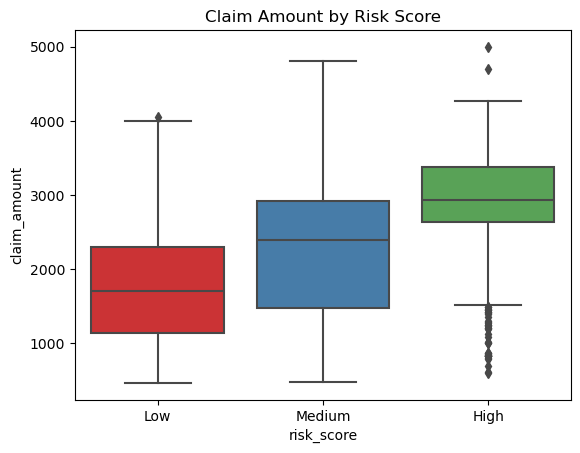

In [25]:
sns.boxplot(data=df, x='risk_score', y='claim_amount', palette='Set1')
plt.title("Claim Amount by Risk Score")
plt.show()

## Multivariate analysis

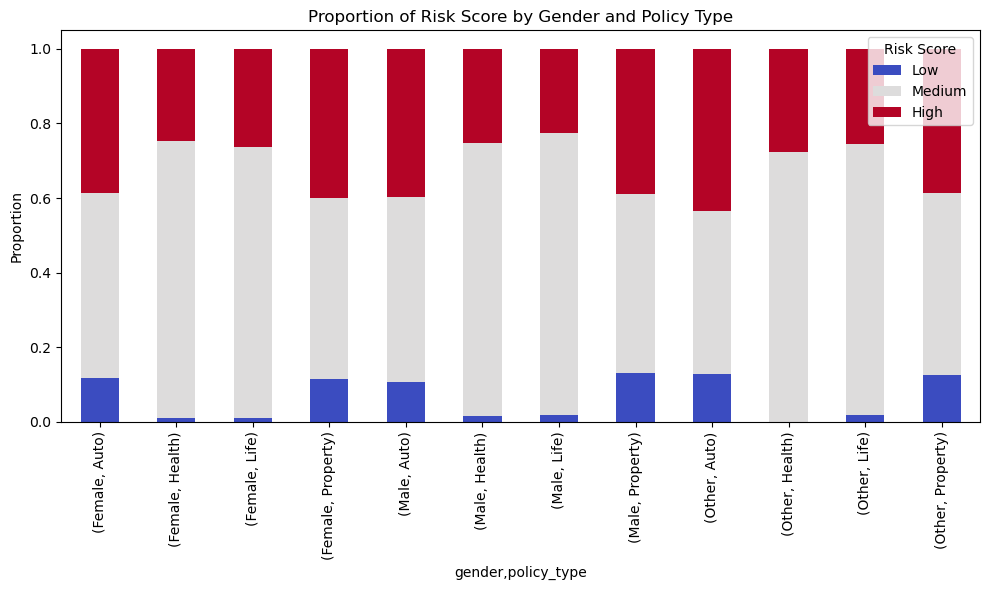

In [26]:
grouped = df.groupby(['gender', 'policy_type', 'risk_score']).size().reset_index(name='count')

# Pivot for stacked plot
pivot_df = grouped.pivot_table(index=['gender', 'policy_type'], columns='risk_score', values='count', fill_value=0)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plot
pivot_df_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Risk Score by Gender and Policy Type')
plt.ylabel('Proportion')
plt.legend(title='Risk Score', labels=['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()

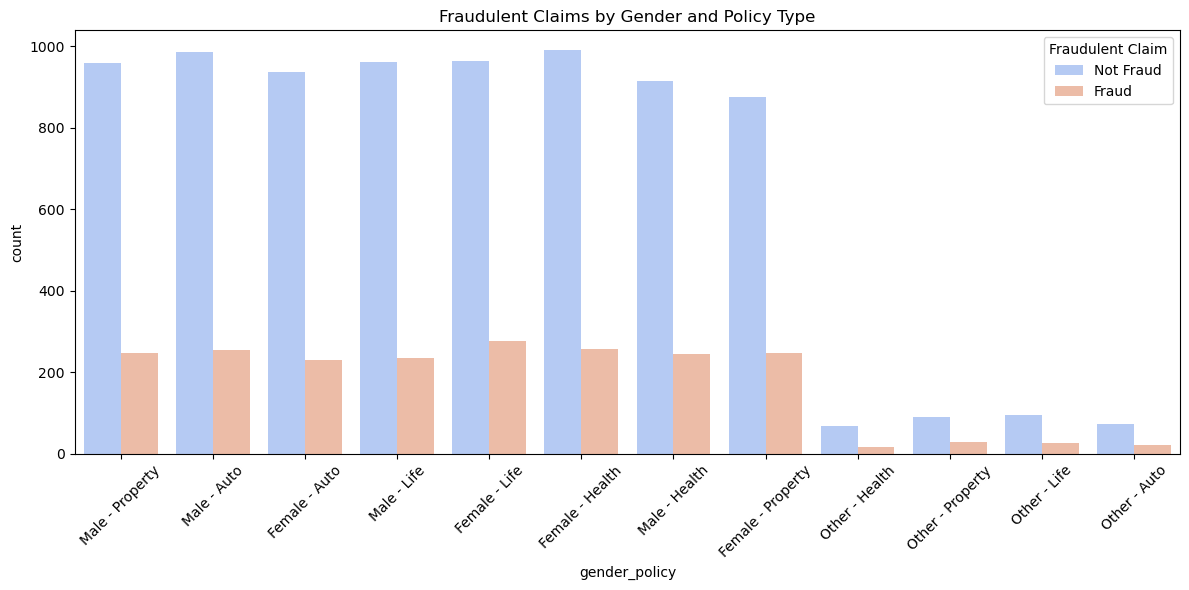

In [27]:
# Create a combined column for gender & policy type
df1['gender_policy'] = df['gender'] + " - " + df['policy_type']
df1['fraudulent_claim'] = df1['fraudulent_claim'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='gender_policy', hue='fraudulent_claim', palette='coolwarm')
plt.title('Fraudulent Claims by Gender and Policy Type')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Claim', labels=['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

## Outlayers

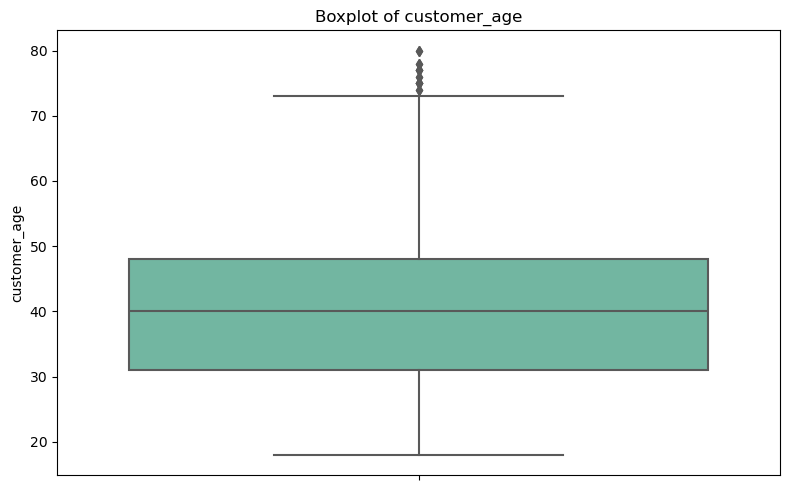

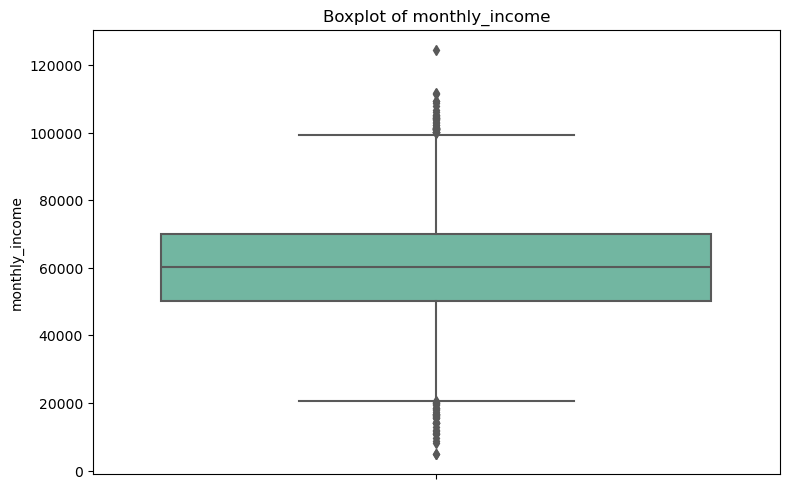

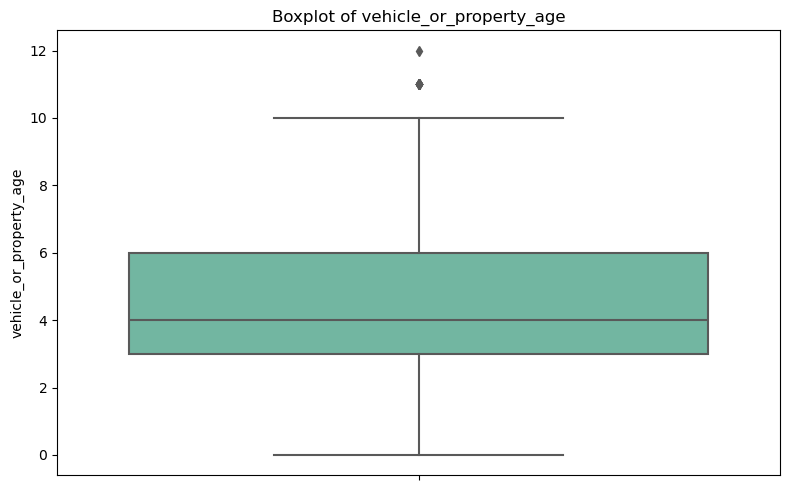

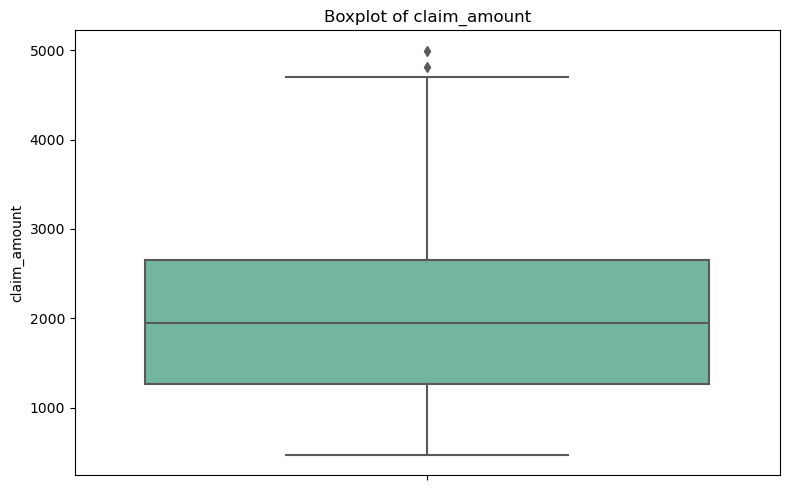

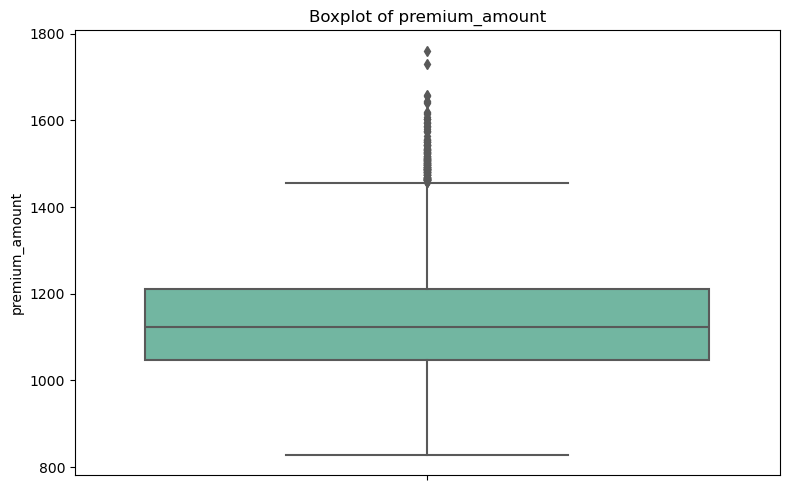

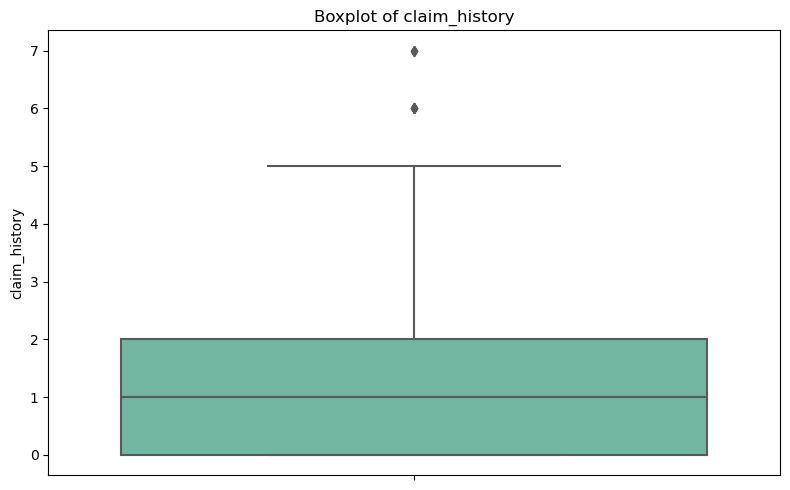

In [28]:
numerical_cols = ['customer_age', 'monthly_income', 'vehicle_or_property_age',
                  'claim_amount', 'premium_amount', 'claim_history']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

## Feature selection & Multivariate Analysis

In [29]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols].corr()

customer_age  monthly_income  \
customer_age                 1.000000       -0.017205   
monthly_income              -0.017205        1.000000   
vehicle_or_property_age     -0.000987       -0.000554   
claim_history                0.012592        0.007593   
fraudulent_claim            -0.004355       -0.001712   
premium_amount               0.061155        0.003642   
claim_amount                 0.016752       -0.008391   
policy_upgrade               0.004808       -0.002176   

                         vehicle_or_property_age  claim_history  \
customer_age                           -0.000987       0.012592   
monthly_income                         -0.000554       0.007593   
vehicle_or_property_age                 1.000000      -0.003924   
claim_history                          -0.003924       1.000000   
fraudulent_claim                        0.024555       0.014329   
premium_amount                         -0.003430       0.878410   
claim_amount                            0.018016       0.210011   
policy_upgrade                         -0.006960       0.009018   

                         fraudulent_claim  premium_amount  claim_amount  \
customer_age                    -0.004355        0.061155      0.016752   
monthly_income                  -0.001712        0.003642     -0.008391   
vehicle_or_property_age          0.024555       -0.003430      0.018016   
claim_history                    0.014329        0.878410      0.210011   
fraudulent_claim                 1.000000        0.018220     -0.011124   
premium_amount                   0.018220        1.000000      0.240576   
claim_amount                    -0.011124        0.240576      1.000000   
policy_upgrade                   0.007504        0.015023      0.004872   

                         policy_upgrade  
customer_age                   0.004808  
monthly_income                -0.002176  
vehicle_or_property_age       -0.006960  
claim_history                  0.009018  
fraudulent_claim               0.007504  
premium_amount                 0.015023  
claim_amount                   0.004872  
policy_upgrade                 1.000000

<Axes: >

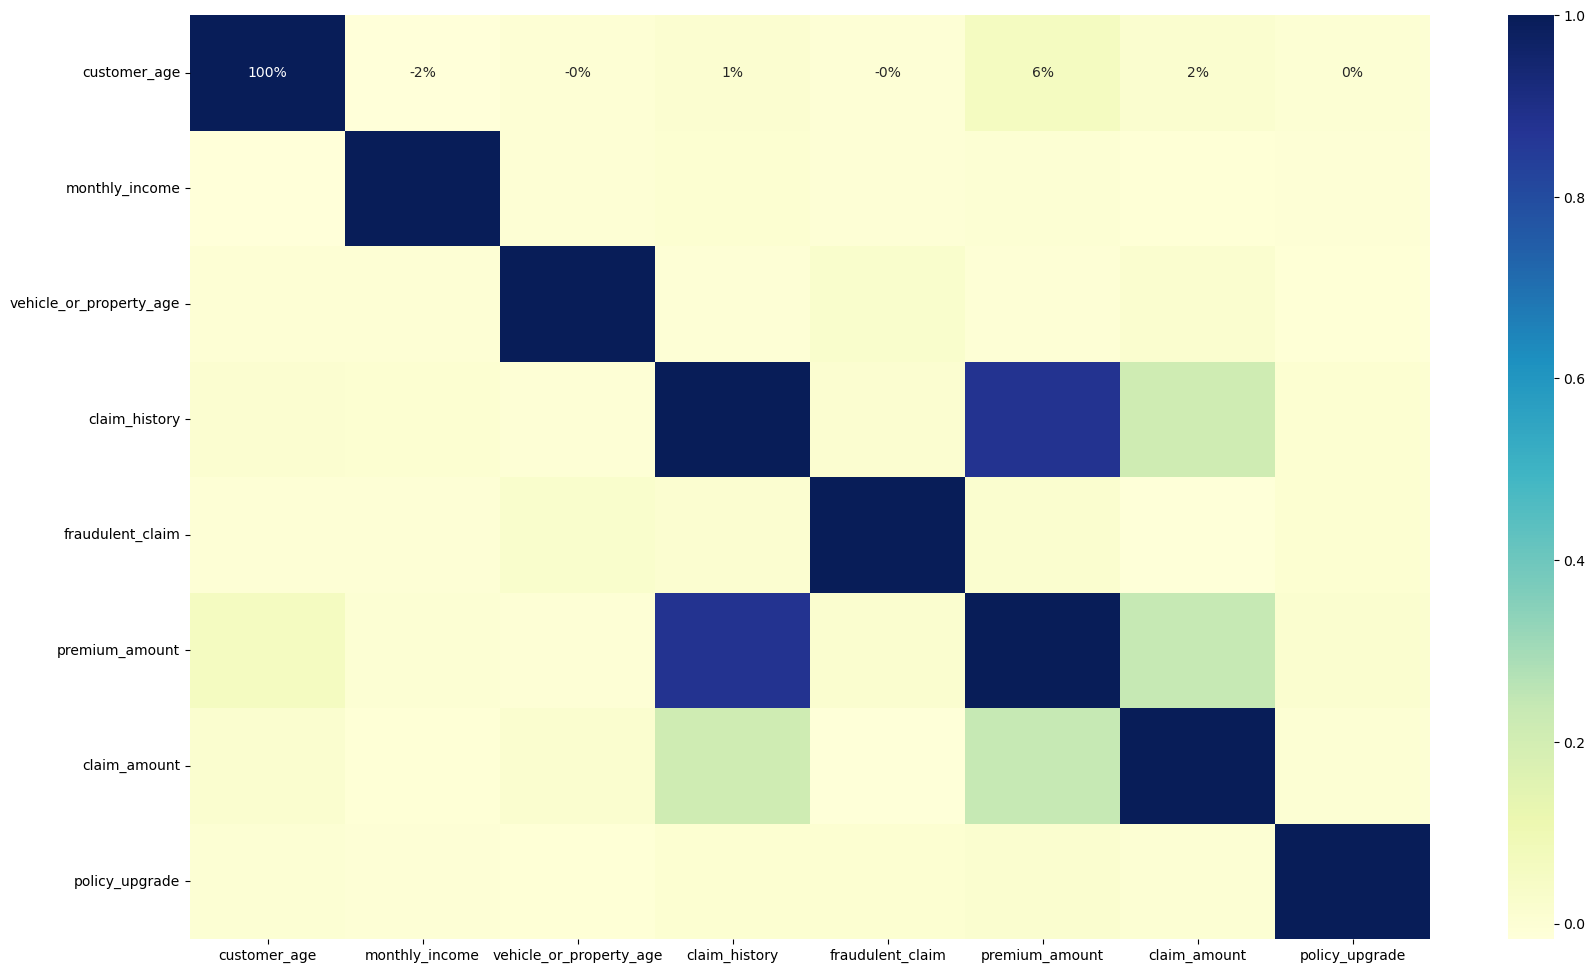

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.0%', cmap='YlGnBu')

# Claim 

In [31]:
df_1=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//insurance//data//claim_base_data.csv")
df_1.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_1.head()

claim_id policyholder_id  claim_date
0  CLM100000      CUST101824  2024-09-04
1  CLM100001      CUST100409  2023-08-23
2  CLM100002      CUST104506  2023-05-20
3  CLM100003      CUST104012  2023-06-07
4  CLM100004      CUST103657  2024-12-24

<Axes: title={'center': 'Monthly Claim Counts'}, xlabel='Month'>

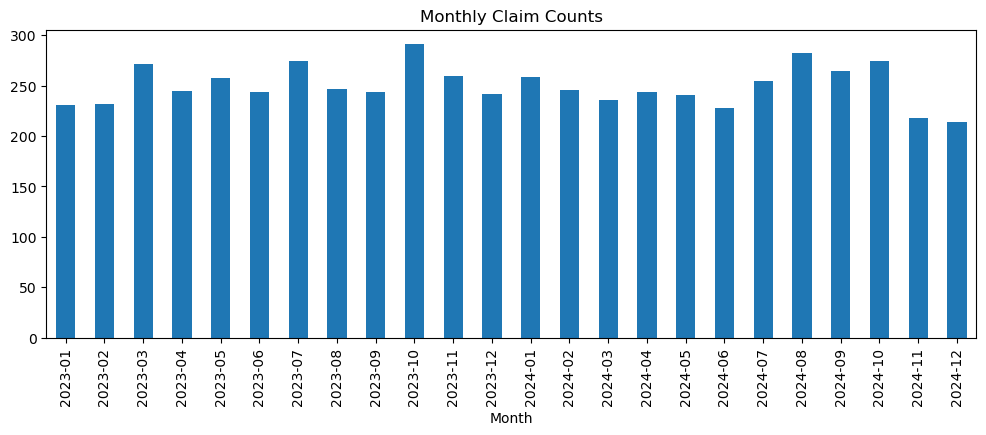

In [32]:
df_1['claim_date'] = pd.to_datetime(df_1['claim_date'])
df_1['Month'] = df_1['claim_date'].dt.to_period('M')

monthly_counts = df_1.groupby('Month').size()

monthly_counts.plot(kind='bar', figsize=(12, 4), title='Monthly Claim Counts')

# Customer Segmentation

In [33]:
df_seg=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//insurance//data//streamlit//cus_seg.csv")
df_seg.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_seg.head()

customer_age  monthly_income  claim_history  policy_upgrade  \
0            45        57926.04              0               1   
1            52        52957.88              0               0   
2            27        64713.71              2               0   
3            33        50990.42              1               0   
4            24        76379.88              0               0   

   total_premium_paid  num_active_policies  location_chicago  location_dallas  \
0             1100.36                    1              True            False   
1             1038.41                    1              True            False   
2             1127.81                    1              True            False   
3             1086.71                    1             False            False   
4             1072.40                    1             False            False   

   location_houston  location_los_angeles  location_new_york  dbscan_cluster  \
0             False                 False              False               0   
1             False                 False              False               1   
2             False                 False              False               1   
3              True                 False              False               1   
4              True                 False              False               1   

        pc1       pc2       pc3  
0 -0.596192 -0.464653 -0.913423  
1 -0.958674 -1.643219  0.056035  
2  0.428349 -0.057522  0.632862  
3 -0.267318 -0.838408 -0.079257  
4  1.342538 -1.197601 -0.295193

In [34]:
# Prepare data
cluster_counts = df_seg['dbscan_cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Customer_Count']

# Custom color map for clusters: adjust as needed
custom_colors = ['lightcoral', 'orange', 'pink', 'skyblue']

# Plotly bar chart
fig = px.bar(
    cluster_counts,
    x='Cluster',
    y='Customer_Count',
    title='Cluster Distribution (DBSCAN)',
    color='Cluster',
    color_discrete_sequence=custom_colors,
    text='Customer_Count'
)

fig.update_layout(
    xaxis_title='DBSCAN Cluster',
    yaxis_title='Number of Customers',
    template='plotly_white',
    showlegend=False
)

fig.show()

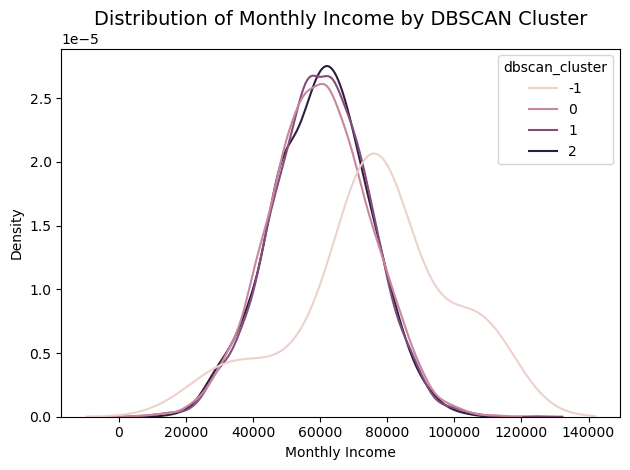

In [35]:
sns.kdeplot(data=df_seg, x='monthly_income', hue='dbscan_cluster', common_norm=False)
plt.title("Distribution of Monthly Income by DBSCAN Cluster", fontsize=14)
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

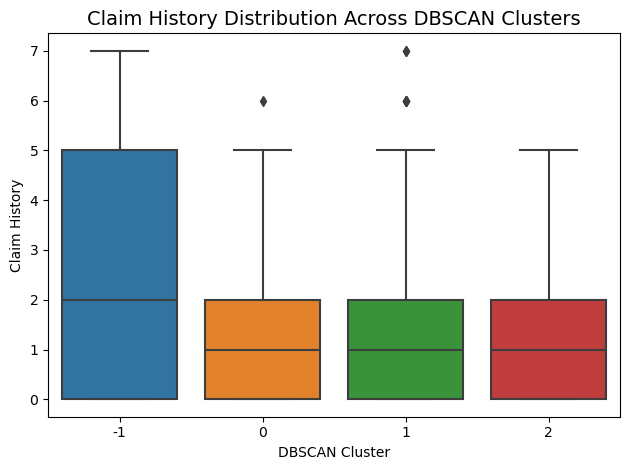

In [36]:
sns.boxplot(data=df_seg, x='dbscan_cluster', y='claim_history')
plt.title("Claim History Distribution Across DBSCAN Clusters", fontsize=14)
plt.xlabel("DBSCAN Cluster")
plt.ylabel("Claim History")
plt.tight_layout()
plt.show()

In [37]:
fig = px.scatter_3d(
    df_seg,
    x='pc1',
    y='pc2',
    z='pc3',
    color='dbscan_cluster',  # Cluster label
    title='Customer Segments in 3D (PCA + DBSCAN)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.8
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(template='plotly_white', legend_title="Cluster")
fig.show()

# NLP

In [38]:
import contractions
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [39]:
# Stopwords
nltk.download("stopwords")

# Tokenizer
nltk.download("punkt")
nltk.download('punkt_tab')

# For Lemmatizer
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//insurance//data//streamlit//reviews.csv")
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

review_text sentiment_label  rating  \
0         Service was okay, nothing special.         Neutral       3   
1          Had to wait weeks for a response.        Negative       2   
2  Average experience, neither good nor bad.         Neutral       3   
3         Support was fine, not exceptional.         Neutral       3   
4      Bought the policy without any issues.         Neutral       3   

       service_type                           clean_text  
0   Policy Purchase         service okay nothing special  
1   Policy Purchase                   wait week response  
2   Policy Purchase  average experience neither good bad  
3             Claim             support fine exceptional  
4  Customer Support          bought policy without issue

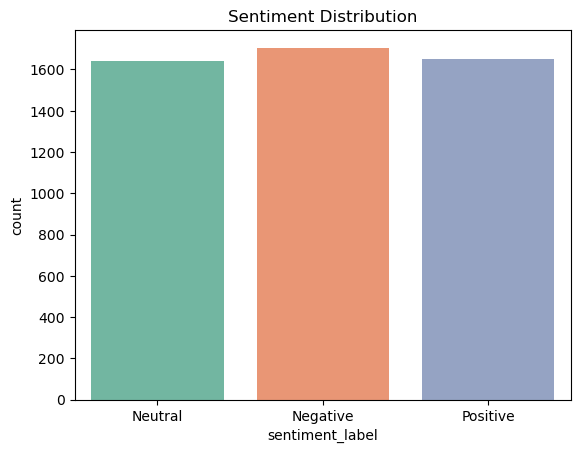

In [41]:
sns.countplot(data=df, x="sentiment_label", palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

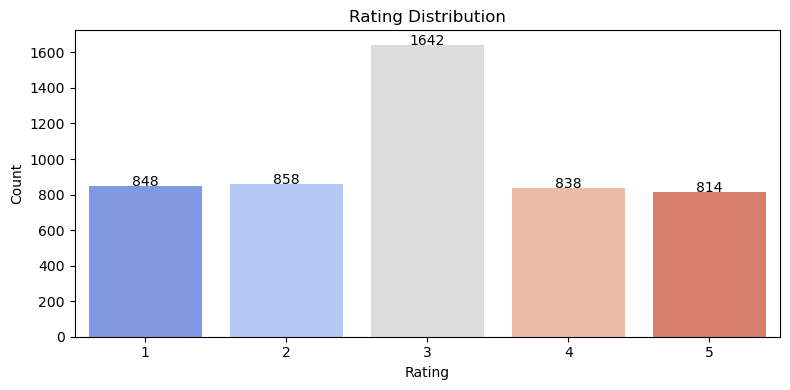

In [42]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

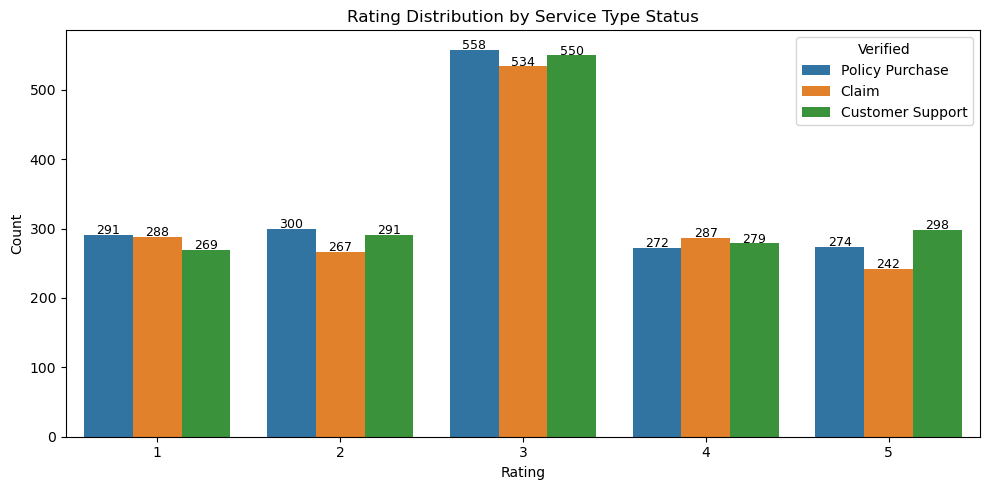

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', hue='service_type')

plt.title('Rating Distribution by Service Type Status')
plt.xlabel('Rating')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=9)

plt.legend(title='Verified')
plt.tight_layout()
plt.show()

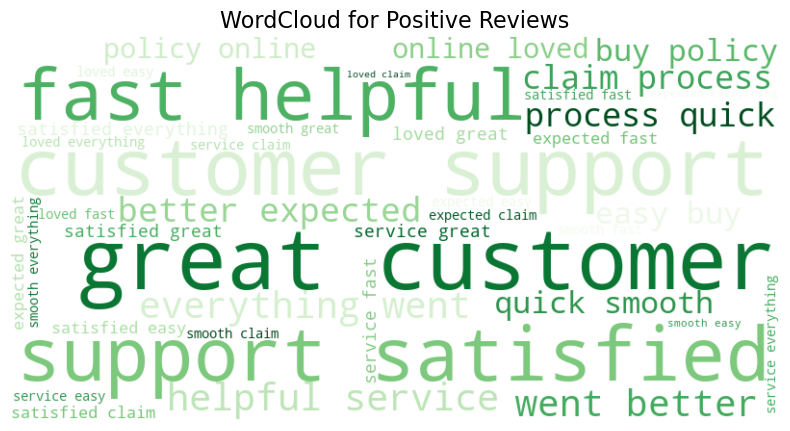

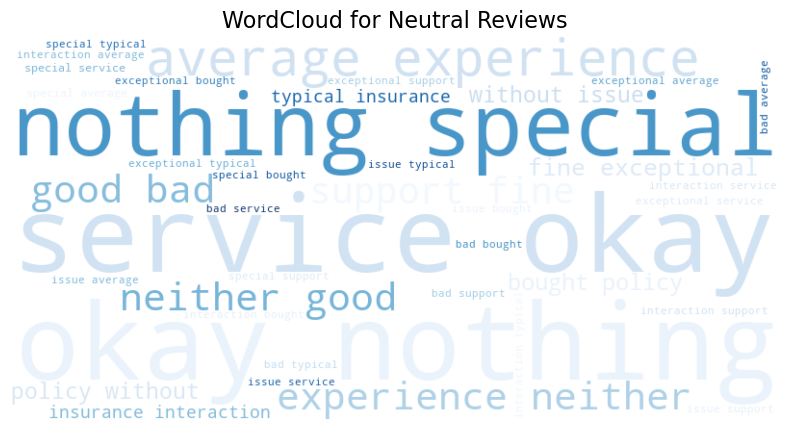

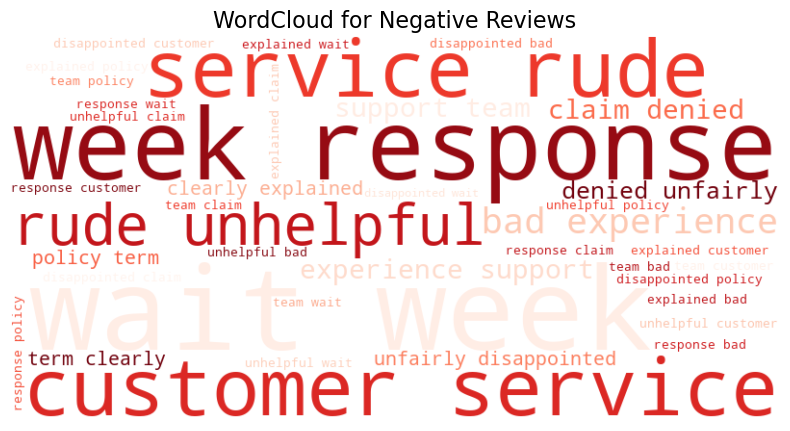

In [44]:
def plot_wordcloud(sentiment, color="viridis"):
    text = " ".join(df[df["sentiment_label"] == sentiment]["clean_text"])
    wc = WordCloud(width=800, height=400, background_color="white",
                   colormap=color, max_words=200).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Reviews", fontsize=16)
    plt.show()

# Generate WordClouds
plot_wordcloud("Positive", color="Greens")
plot_wordcloud("Neutral", color="Blues")
plot_wordcloud("Negative", color="Reds")